In [ ]:
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Optional: progress bar (if you don't have tqdm, you can remove these lines)
try:
    from tqdm.auto import tqdm
except ImportError:
    tqdm = None
    print("tqdm not installed, continuing without progress bars.")

# Base paths (relative to /notebooks)
PROJECT_ROOT = Path("..").resolve()
DATA_RAW = PROJECT_ROOT / "data" / "raw"

TRACKS_FEATURES_PATH      = DATA_RAW / "tracks_features.csv"
SPOTIFY_DATA_PATH         = DATA_RAW / "spotify_data.csv"
SPOTIFY_2023_PATH         = DATA_RAW / "spotify_features_data_2023.csv"
TRACKS_PATH               = DATA_RAW / "tracks.csv"
278k_PATH                 = DATA_RAW / "278k_labelled_uri.csv"
DATA_PATH                 = DATA_RAW / "data.csv"
RAW_SONGS_PATH            = DATA_RAW / "raw songs dataset.csv"
APRIL_2019_PATH           = DATA_RAW / "SpotifyAudioFeaturesApril2019.csv"
MPD_DIR                   = DATA_RAW / "mpd"

TRACKS_FEATURES_PATH, SPOTIFY_DATA_PATH, SPOTIFY_2023_PATH, TRACKS_PATH, 278k_PATH, DATA_PATH, RAW_SONGS_PATH, APRIL_2019_PATH, MPD_DIR


c:\Users\Kiera\Music_Recommender\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/tracks_features.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/spotify_data.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/spotify_features_data_2023.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/tracks.csv'),
 WindowsPath('C:/Users/Kiera/Music_Recommender/data/raw/mpd'))

In [2]:
tracks_features_df = pd.read_csv(TRACKS_FEATURES_PATH)
spotify_data_df = pd.read_csv(SPOTIFY_DATA_PATH)
spotify_2023_df = pd.read_csv(SPOTIFY_2023_PATH)
tracks_df = pd.read_csv(TRACKS_PATH)

print("tracks_features.csv shape:          ", tracks_features_df.shape)
print("spotify_data.csv shape:             ", spotify_data_df.shape)
print("spotify_features_data_2023.csv shape:", spotify_2023_df.shape)
print("tracks.csv shape:                   ", tracks_df.shape)

display(tracks_features_df.head(3))
display(spotify_data_df.head(3))
display(spotify_2023_df.head(3))
display(tracks_df.head(3))


tracks_features.csv shape:           (1204025, 24)
spotify_data.csv shape:              (1159764, 20)
spotify_features_data_2023.csv shape: (438112, 18)
tracks.csv shape:                    (586672, 20)


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.0234,0.000002,0.122,0.370,149.749,298893,4.0,1999,1999-11-02


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.338,0.000050,0.0895,0.145,139.832,158960,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.460,0.125,11,-8.094,0,0.0371,0.891,0.000,0.1650,0.275,75.639,audio_features,18r5gmlp3vQykXCskNJI0e,spotify:track:18r5gmlp3vQykXCskNJI0e,https://api.spotify.com/v1/tracks/18r5gmlp3vQy...,https://api.spotify.com/v1/audio-analysis/18r5...,89969,5
1,0.621,0.125,10,-19.686,0,0.0376,0.977,0.916,0.1040,0.321,166.048,audio_features,0zfslMAEFfuIjkgxa6tEPc,spotify:track:0zfslMAEFfuIjkgxa6tEPc,https://api.spotify.com/v1/tracks/0zfslMAEFfuI...,https://api.spotify.com/v1/audio-analysis/0zfs...,188793,4
2,0.351,0.125,6,-18.151,0,0.0421,0.985,0.927,0.0972,0.157,100.256,audio_features,0Ah41mjuPtj9TXfElZ59WK,spotify:track:0Ah41mjuPtj9TXfElZ59WK,https://api.spotify.com/v1/tracks/0Ah41mjuPtj9...,https://api.spotify.com/v1/audio-analysis/0Ah4...,191360,4


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.445,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.263,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.177,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5


In [3]:
# Standardise ID columns to strings and get unique IDs

ids_tracks_features = set(tracks_features_df["id"].dropna().astype(str))
ids_spotify_data    = set(spotify_data_df["track_id"].dropna().astype(str))
ids_spotify_2023    = set(spotify_2023_df["id"].dropna().astype(str))
ids_tracks          = set(tracks_df["id"].dropna().astype(str))

# Union: any track that appears in at least one of the feature datasets
ids_features_union = (
    ids_tracks_features
    | ids_spotify_data
    | ids_spotify_2023
    | ids_tracks
)

print(f"Unique track IDs in tracks_features.csv:           {len(ids_tracks_features):,}")
print(f"Unique track IDs in spotify_data.csv (track_id):   {len(ids_spotify_data):,}")
print(f"Unique track IDs in spotify_features_data_2023.csv:{len(ids_spotify_2023):,}")
print(f"Unique track IDs in tracks.csv:                    {len(ids_tracks):,}")
print("-" * 60)
print(f"Unique track IDs in UNION of all feature sources:  {len(ids_features_union):,}")


Unique track IDs in tracks_features.csv:           1,204,025
Unique track IDs in spotify_data.csv (track_id):   1,159,764
Unique track IDs in spotify_features_data_2023.csv:438,112
Unique track IDs in tracks.csv:                    586,672
------------------------------------------------------------
Unique track IDs in UNION of all feature sources:  3,195,887


In [4]:
def extract_track_id_from_uri(track_uri: str) -> str:
    """
    Convert 'spotify:track:0UaMYEvWZi0ZqiDOoHU3YI' → '0UaMYEvWZi0ZqiDOoHU3YI'.
    """
    if not isinstance(track_uri, str):
        return None
    parts = track_uri.split(":")
    return parts[-1] if len(parts) >= 3 else None

# Quick sanity check
test_uri = "spotify:track:0UaMYEvWZi0ZqiDOoHU3YI"
extract_track_id_from_uri(test_uri)


'0UaMYEvWZi0ZqiDOoHU3YI'

In [5]:
mpd_files = sorted(MPD_DIR.glob("mpd.slice.*.json"))
print(f"Found {len(mpd_files)} MPD slice files")

mpd_track_ids = set()
playlist_count = 0
track_count = 0

# Use tqdm if available, otherwise just iterate normally
iterator = mpd_files
if tqdm is not None:
    iterator = tqdm(mpd_files)

for path in iterator:
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    playlists = data.get("playlists", [])
    playlist_count += len(playlists)
    
    for pl in playlists:
        tracks = pl.get("tracks", [])
        track_count += len(tracks)
        for t in tracks:
            uri = t.get("track_uri")
            tid = extract_track_id_from_uri(uri)
            if tid:
                mpd_track_ids.add(tid)

print(f"Total playlists in MPD slices:            {playlist_count:,}")
print(f"Total track entries (with duplicates):    {track_count:,}")
print(f"Unique track IDs in MPD:                  {len(mpd_track_ids):,}")


Found 20 MPD slice files


100%|██████████| 20/20 [00:05<00:00,  3.45it/s]

Total playlists in MPD slices:            20,000
Total track entries (with duplicates):    1,339,962
Unique track IDs in MPD:                  261,689


In [6]:
n_mpd = len(mpd_track_ids)

def overlap_stats(name, feature_ids):
    n_feat = len(feature_ids)
    inter = mpd_track_ids & feature_ids
    n_inter = len(inter)
    print(f"{name}")
    print(f"  Unique feature track IDs:           {n_feat:,}")
    print(f"  Overlap with MPD:                   {n_inter:,}")
    if n_mpd > 0:
        print(f"    - % of MPD covered by {name}:     {n_inter / n_mpd * 100:6.2f}%")
    if n_feat > 0:
        print(f"    - % of {name} that are in MPD:    {n_inter / n_feat * 100:6.2f}%")
    print()

overlap_stats("tracks_features.csv (id)", ids_tracks_features)
overlap_stats("spotify_data.csv (track_id)", ids_spotify_data)
overlap_stats("spotify_features_data_2023.csv (id)", ids_spotify_2023)
overlap_stats("tracks.csv (id)", ids_tracks)
overlap_stats("UNION of all feature sources", ids_features_union)


tracks_features.csv (id)
  Unique feature track IDs:           1,204,025
  Overlap with MPD:                   21,550
    - % of MPD covered by tracks_features.csv (id):       8.23%
    - % of tracks_features.csv (id) that are in MPD:      1.79%

spotify_data.csv (track_id)
  Unique feature track IDs:           1,159,764
  Overlap with MPD:                   46,197
    - % of MPD covered by spotify_data.csv (track_id):      17.65%
    - % of spotify_data.csv (track_id) that are in MPD:      3.98%

spotify_features_data_2023.csv (id)
  Unique feature track IDs:           438,112
  Overlap with MPD:                   9,567
    - % of MPD covered by spotify_features_data_2023.csv (id):       3.66%
    - % of spotify_features_data_2023.csv (id) that are in MPD:      2.18%

tracks.csv (id)
  Unique feature track IDs:           586,672
  Overlap with MPD:                   34,555
    - % of MPD covered by tracks.csv (id):      13.20%
    - % of tracks.csv (id) that are in MPD:      5.89%

UN

Unique track IDs in MPD:                    261,689
Unique track IDs in features UNION:         3,195,887
Overlap (tracks in both):                   85,729
  - % of MPD tracks covered by UNION:       32.76%
  - % of UNION tracks that appear in MPD:   2.68%


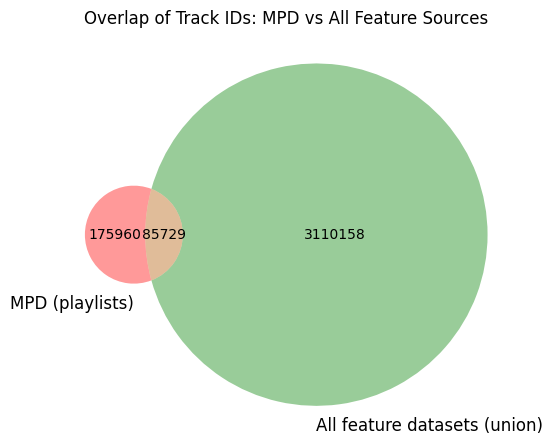

In [7]:
n_feat_union = len(ids_features_union)
intersection_union = mpd_track_ids & ids_features_union
n_inter_union = len(intersection_union)

print(f"Unique track IDs in MPD:                    {n_mpd:,}")
print(f"Unique track IDs in features UNION:         {n_feat_union:,}")
print(f"Overlap (tracks in both):                   {n_inter_union:,}")
print(f"  - % of MPD tracks covered by UNION:       {n_inter_union / n_mpd * 100:.2f}%")
print(f"  - % of UNION tracks that appear in MPD:   {n_inter_union / n_feat_union * 100:.2f}%")

plt.figure(figsize=(6, 6))
venn2(
    subsets=(
        n_mpd - n_inter_union,        # MPD only
        n_feat_union - n_inter_union, # Features only
        n_inter_union                 # Both
    ),
    set_labels=("MPD (playlists)", "All feature datasets (union)")
)
plt.title("Overlap of Track IDs: MPD vs All Feature Sources")
plt.show()
